In [7]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

mapa = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}

dados = dados.rename(columns = mapa)

troca = {
    0: 1,
    1: 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)


x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')

modelo.fit(treino_x, treino_y)

Treinaremos com 1617 elementos e testaremos com 540 elementos


SVC(gamma='auto')

In [13]:
from sklearn.metrics import accuracy_score

previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(taxa_de_acerto)

59.074074074074076


In [14]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [15]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [16]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [17]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

/Users/felps/Felps/machine-learning-studies/.venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


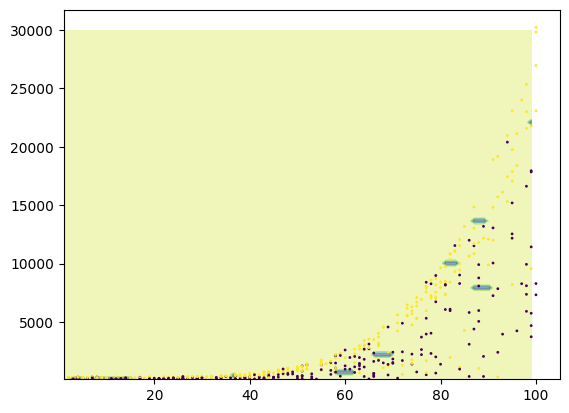

In [18]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [26]:
from sklearn.preprocessing import StandardScaler


SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')

modelo.fit(treino_x, treino_y)

Treinaremos com 1617 elementos e testaremos com 540 elementos


/Users/felps/Felps/machine-learning-studies/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/felps/Felps/machine-learning-studies/.venv/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


SVC(gamma='auto')

66.85185185185185


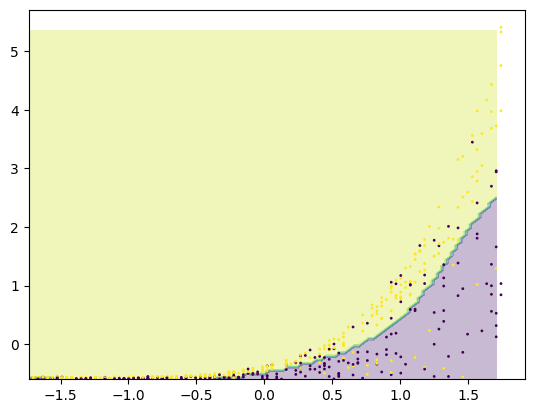

In [27]:
from sklearn.metrics import accuracy_score

previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print(taxa_de_acerto)

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)